In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import impt
import jax
import fitsio
import fpfs
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt
from astropy.visualization import simple_norm

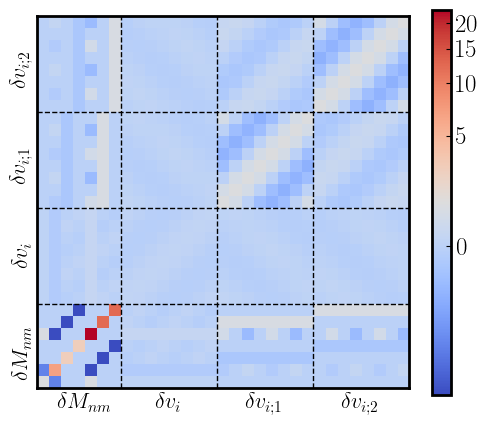

In [60]:
plt.close()
a=pyfits.getdata('cat_n1_p1/cov_matrix.fits')
fig,axes = pltutil.make_figure_axes(1,1, square=True)
ax=axes[0]
ma = ax.imshow(a, origin='lower', aspect='equal', cmap='coolwarm',interpolation='None',
               norm=simple_norm(a,'log', log_a=40,min_cut=-2.,max_cut=23.))
#cmap='cividis')
ax.set_xticks([3.5, 10.5, 18.5, 26.5])
ax.set_xticklabels([r'$\delta M_{nm}$', r'$\delta v_i$', r'$\delta v_{i;1}$', r'$\delta v_{i;2}$'])
ax.set_yticks([4, 11, 19, 27])
ax.set_yticklabels([r'$\delta M_{nm}$', r'$\delta v_i$', r'$\delta v_{i;1}$', r'$\delta v_{i;2}$'], rotation='vertical')
ax.tick_params(axis='both', which='both', length=0, labelsize=16)
for xy in [6.5, 14.5, 22.5]:
    ax.axvline(xy, c="black", ls='--', linewidth=1)
    ax.axhline(xy, c="black", ls='--', linewidth=1)
plt.colorbar(ma)
fig.savefig('./plots/covmat.pdf')

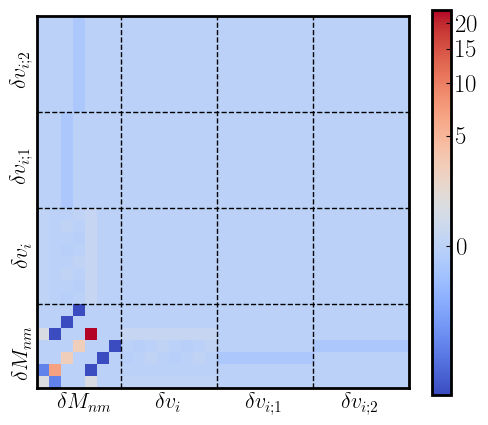

In [69]:
cat_fname = os.path.join(fpfs.__data_dir__, 'fpfs-cut32-0000-g1-0000.fits')
mms = pyfits.getdata(cat_fname)
cov_mat2 = fpfs.catalog.fpfscov_to_imptcov(mms)

plt.close()
a=pyfits.getdata('cat_n1_p1/cov_matrix.fits') * np.int_(np.abs(cov_mat2)> 1e-10)
fig,axes = pltutil.make_figure_axes(1,1, square=True)
ax=axes[0]
ma = ax.imshow(a, origin='lower', aspect='equal', cmap='coolwarm',interpolation='None',
               norm=simple_norm(a,'log', log_a=40,min_cut=-2.,max_cut=23.))
ax.set_xticks([3.5, 10.5, 18.5, 26.5])
ax.set_xticklabels([r'$\delta M_{nm}$', r'$\delta v_i$', r'$\delta v_{i;1}$', r'$\delta v_{i;2}$'])
ax.set_yticks([4, 11, 19, 27])
ax.set_yticklabels([r'$\delta M_{nm}$', r'$\delta v_i$', r'$\delta v_{i;1}$', r'$\delta v_{i;2}$'], rotation='vertical')
ax.tick_params(axis='both', which='both', length=0, labelsize=16)
for xy in [6.5, 14.5, 22.5]:
    ax.axvline(xy, c="black", ls='--', linewidth=1)
    ax.axhline(xy, c="black", ls='--', linewidth=1)
plt.colorbar(ma)
fig.savefig('./plots/covmat_ana.pdf')